# Lab 02: Nonlinear Regression and Overfitting - Take-home exercise

In [1]:
NAME = "NguyenThaiAnh"
ID = "122910"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
def h(X, theta):
    return X.dot(theta)

In [4]:
def regression(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

In [5]:
def rmse(y, y_pred):
    error= np.sqrt(np.square((y-(y_pred))).sum()/y.shape[0])
    return error

In [6]:
def get_predictions(x, theta):
    x = np.array([x]).T
    n = len(theta)
    X = np.insert(x, 0, 1, axis=1)
    i = 1
    while i < n-1:
        X = np.insert(X, i+1, x[:,0]**(i+1), axis=1) 
        i = i+1
    y = h(X, theta)
    return y

In [7]:
def r_squared(y, y_pred):
    r_sqr = 1 - ((np.square(y - y_pred)).sum() / (np.square(y - y.mean())).sum())
    return r_sqr

In [8]:
def residual_error(y, y_pred):
    error= y - y_pred
    return error

In [9]:
def x_polynomial(x, n):
    X = np.ones((x.shape[0], 1))    
    for i in range(n):
        X = np.concatenate((X,x**(i+1)), axis = 1)
    return X

In [10]:
def cost(theta,X,y):
    y_hat = h(X,theta)
    dy = y_hat - y
    J = (1/(2*(X.shape[0]))) * (np.dot(dy.T, dy))
    return J

In [11]:
data = np.genfromtxt('lab1data2.txt',delimiter = ',', dtype=str);

In [12]:
headers = data[0,:];
data = np.array(data[:,:], dtype=float);
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
data_norm = (data - means) / stds

y= data_norm[:,2]
X = data_norm[:,0:2]
m = X.shape[0]
print('Successfully extracted {} records.'.format(m))

Successfully extracted 47 records.


In [13]:
# Splitting training and test set
idx = np.arange(0,m)
random.seed(1412)
random.shuffle(idx)

percent_train = 0.6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]
X_train = data_norm[train_idx,0:2];
X_test = data_norm[test_idx,0:2];

y_train = data_norm[train_idx,2];
y_test = data_norm[test_idx,2];

print(X_train)

[[ 2.05187753e-01  1.10220517e+00]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.31415422e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [ 8.09357707e-01 -2.26093368e-01]
 [-1.46104938e+00 -1.55439190e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [ 3.80715024e-01  1.10220517e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 2.81647389e+00  1.10220517e+00]
 [-1.14560907e+00 -2.26093368e-01]
 [-9.72625673e-01 -2.26093368e-01]
 [-7.16966387e-01 -2.26093368e-01]
 [ 5.00114703e-02  1.10220517e+00]
 [-6.44465993e-01 -2.26093368e-01]
 [-1.89112638e-01  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [ 2.53521350e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-1.99450507e-02  1.10220517e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.43322915e-01 -1.55439190e+00]
 [ 3.15099326e+00  2.43050370e+00]
 [ 1.67029651e-01  1.10220517e+00]
 [ 1.44532608e+00 -2.26093368e-01]
 [-1.01841540e+00 -2.26093368e-01]
 [-5.93588523e-01 -2.26093368e-01]
 [-2.97227261e-01 -2.26093368e-01]]


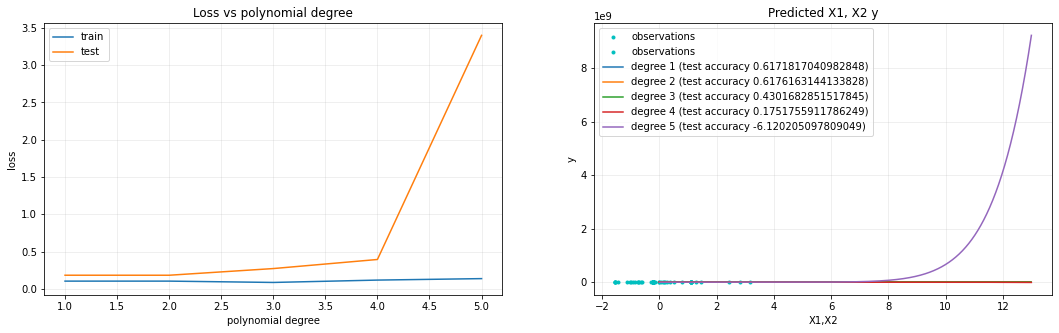

In [14]:
max_degree = 5

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)    
    J_train[i-1] = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    
    # Plot
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted X1, X2 y')
plt2.set_xlabel('X1,X2')
plt2.set_ylabel('y')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()


This is the phenomenon of overfitting!

In [15]:
data = np.genfromtxt('lab1data2.txt',delimiter = ',', dtype=str);

In [16]:
# Extract y column from raw data
# Extract x column (year and month) from raw data
# Extract raw data
headers = data[0,:];
data = np.array(data[:,:], dtype=float);
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
data_norm = (data - means) / stds
    
y_txt = data[:,2]
# Extract X from normalized data
X1 = data[:,[0]]
X2 = data[:,[1]]

X_txt = data[:,0:2]

m = X_txt.shape[0]
n = X_txt.shape[1]
X_txt = X_txt.reshape(m, n)
print('Extracted %d sales records' % m)
print('number of x set:', n)

Extracted 47 sales records
number of x set: 2


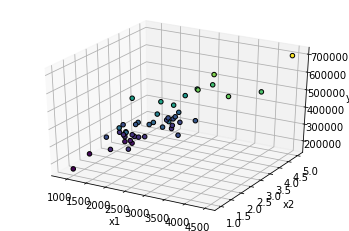

In [17]:
# Plot the data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
x_1 = X1
x_2 = X2
y_1 = data[:,2];
# 3. plot by using scatter
p = ax.scatter(x_1,x_2,y_1,edgecolors='black',c=data[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
# 4. set x, y, z label


plt.show()

In [18]:
def partition(X, y, percent_train):
    idx = np.arange(0,y.shape[0])
    random.seed(1412) 
    random.shuffle(idx)
    m_train = int(m*percent_train)
    train = idx[0:m_train]
    test = idx[len(train):]
    
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]    
    y_test = y[test]
    return idx, X_train, y_train, X_test, y_test
idx, X_train, y_train, X_test, y_test = partition(X_txt, y_txt, 0.6)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(idx[5:9])


(28, 2)
(28,)
(19, 2)
(19,)
[44 16 15 14]


In [20]:
Xi_train, Xi_test = x_polynomial(X_train, 1) , x_polynomial(X_test, 1)
theta = regression(Xi_train, y_train)
y_pred_test =  h(Xi_test,theta)
J_train, J_test = cost(theta, Xi_train, y_train), cost(theta, Xi_test, y_test)

In [21]:
print("Xi_train[:3]:", np.round(Xi_train[:3], 2))
print("Xi_test[:3]:", np.round(Xi_test[:3], 2))
print("theta:", theta)
print("y_pred_test[:5]:", np.round(y_pred_test[:5].T, 2))
print("J_train:", J_train)
print("J_test:", J_test)


Xi_train[:3]: [[1.000e+00 2.162e+03 4.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 2.104e+03 3.000e+00]]
Xi_test[:3]: [[1.000e+00 1.811e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 2.526e+03 3.000e+00]]
theta: [66140.15125289   131.69615423  2081.94069183]
y_pred_test[:5]: [312969.65 473638.96 405050.46 264398.97 332855.77]
J_train: 1586534107.3091235
J_test: 2796674293.454625


In [22]:
num_linspace = 100
x_series, y_series = np.linspace(np.min(X_txt[:,0])-1,np.max(X_txt[:,0])+1,num_linspace),np.linspace(np.min(X_txt[:,1])-1,np.max(X_txt[:,1])+1, num_linspace)
x_mesh, y_mesh = np.meshgrid(x_series, y_series)
xy_mesh = np.concatenate((x_mesh.reshape(100,100,1), y_mesh.reshape(100,100,1)), axis = 2)

# 2. predict output from xy_mesh to be z_series
#    Hint: use mesh_predictions function instead of get_prediction
def mesh_predictions(x, theta):
    x = np.insert(x, 0, 1, axis=x.ndim-1)
    theta = theta.reshape(-1,1)
    y = x@theta
    return y
z_series = mesh_predictions(xy_mesh,theta).reshape(100,100)


In [23]:
print("xy_mesh.shape", xy_mesh.shape)
print("z_series.shape", z_series.shape)

xy_mesh.shape (100, 100, 2)
z_series.shape (100, 100)


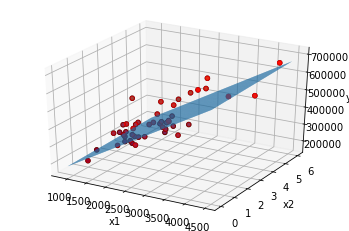

In [24]:
fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
x_1= X_txt[:,0]
x_2= X_txt[:,1]
y_1 = y_txt[:]
# 3. plot by using scatter
# 4. set x, y, z label
p = ax.scatter(x_1,x_2,y_1,edgecolors='black',c=data[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
# 5. Plot surface from x_mesh, y_mesh, and z_series

ax.plot_surface(x_mesh, y_mesh, z_series)
ax.scatter(x_1, x_2, y_1,color = 'red')

plt.show()

3D plot: Polynomial degree 2 



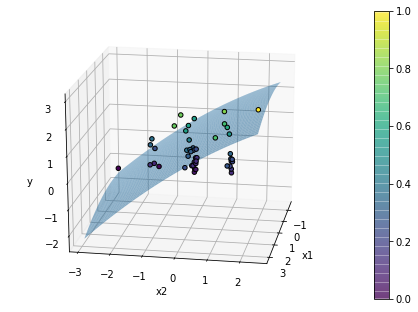

3D plot: Polynomial degree 3 



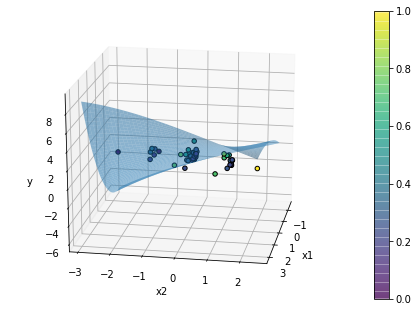

In [25]:
data_txt = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

y = data_txt[:,2];                      
X = data_txt[:,0:2];                 
m = data_norm.shape[0]

percent_train = .6
random.shuffle(idx)
    
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

X_train = data_txt[train_idx, 0:2];
X_test = data_txt[test_idx, 0:2];
y_train = data_txt[train_idx, 2];
y_test = data_txt[test_idx, 2];

#=============================

# Polynomial regression model d=2, 3
for i in range(2):
    Xi_train = x_polynomial(X_train, i + 2)    
    Xi_test = x_polynomial(X_test, i + 2)

    theta = regression(Xi_train, y_train)
    J_train = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test = cost(theta, Xi_test, y_test)   

    # 3D plot
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig)
    x = data_txt[:, 0]
    y = data_txt[:, 1]
    z = data_txt[:, 2]

    # 3. plot by using scatter
    p = ax.scatter(x,y, z,edgecolors='black', c= data_norm[:,2],alpha=1)

    # 4. set x, y, z label
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    # plot observation
    x_series = np.linspace(min(data_txt[:,0]), max(data_txt[:,0]),len(y_txt))
    y_series = np.linspace(min(data_txt[:,1]), max(data_txt[:,1]),len(y_txt))

    x_mesh, y_mesh = np.meshgrid(x_series, y_series)
    
    if i == 0: # degree 2
        yy =(theta[0] +theta[1]*x_mesh.T+theta[2]*y_mesh+theta[3]*(x_mesh*y_mesh)+theta[4]*(y_mesh**2+x_mesh**2))
        print("3D plot: Polynomial degree 2","\n")
    else: # degree 3
        yy=(theta[0]+theta[1]*(x_mesh+y_mesh).T+theta[2]*x_mesh*y_mesh +theta[3]*x_mesh**2+theta[4]*y_mesh**2+theta[5]* y_mesh*x_mesh**2+theta[6]*y_mesh**3)
        print("3D plot: Polynomial degree 3","\n")

    p = ax.plot_surface(x_mesh, y_mesh,yy,alpha=0.5)
    ax.view_init(elev=20, azim=10)
    plt.colorbar(p)
    plt.show()

It shows sign of overfitting.